<a href="https://colab.research.google.com/github/ChaitanyaKulkarni001/MachineLearning/blob/main/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

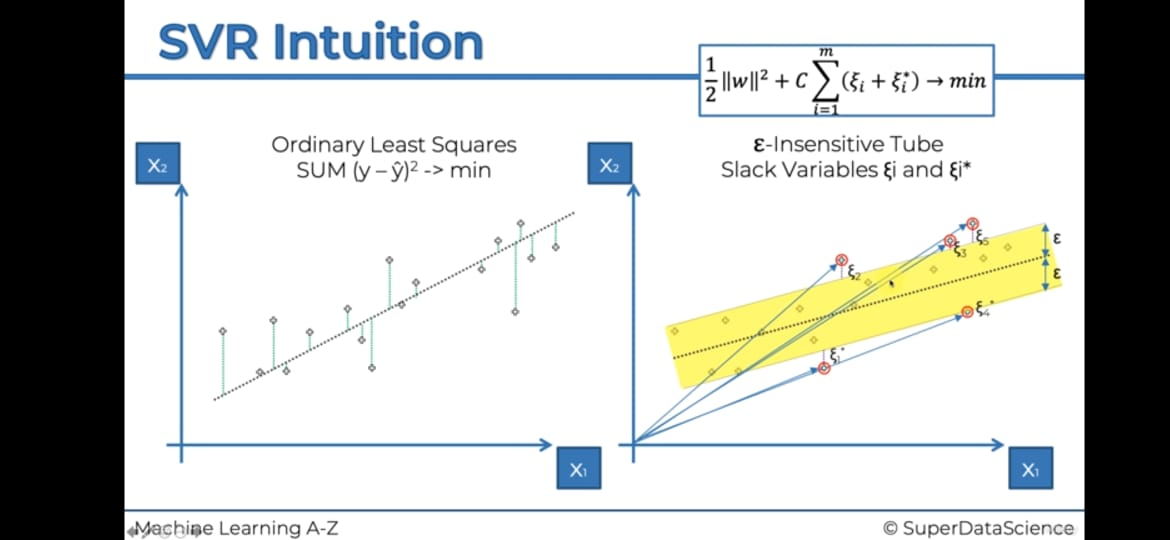

# **Feature Scalling**

- When dependand variables take values like 0, 1 we dont reuire to apply feature scalling

- WHen the dependant variables have super high range w.r. to other multiple  feature then we have to apply it including all features and the dependant variable.

- We have to apply the feature scalling after the split in train and test set

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('/content/Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

P = X
Q = y

In [4]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [5]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [6]:
from sklearn.preprocessing import StandardScaler

sc_inde = StandardScaler()
sc_depen = StandardScaler()


X = sc_inde.fit_transform(X)
y = sc_depen.fit_transform(y)


In [7]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [8]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# **Training the SVR model on whole dataset**

- Any machiary model that is not based on neural  network, sklearn wll be best option!

The Gaussian RBG kernal

```
K ( x ,l ^i ) = e^( -(||x-l^i||^2)/ 2 (sigma)^2)
```
[Formula](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)


[Click here](https://data-flair.training/blogs/svm-kernel-functions/#google_vignette)

In [9]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [10]:
regressor.predict(sc_inde.transform([[6.5]]))


array([-0.27861589])

Inverse Transform - reverse scalling

In [11]:
sc_depen.inverse_transform((regressor.predict(sc_inde.transform([[6.5]]))).reshape(-1,1))


array([[170370.0204065]])

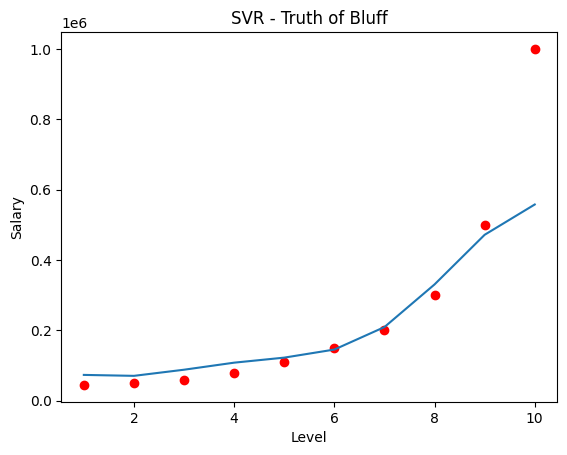

In [12]:
plt.scatter(sc_inde.inverse_transform(X),sc_depen.inverse_transform(y),color='red')
plt.plot(sc_inde.inverse_transform(X),sc_depen.inverse_transform((regressor.predict(X)).reshape(-1,1)))
plt.title("SVR - Truth of Bluff")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

Higher Resolutin and smoother curve

<ipython-input-20-43ae3d55162a>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_inde.inverse_transform(X)), max(sc_inde.inverse_transform(X)), 0.1)


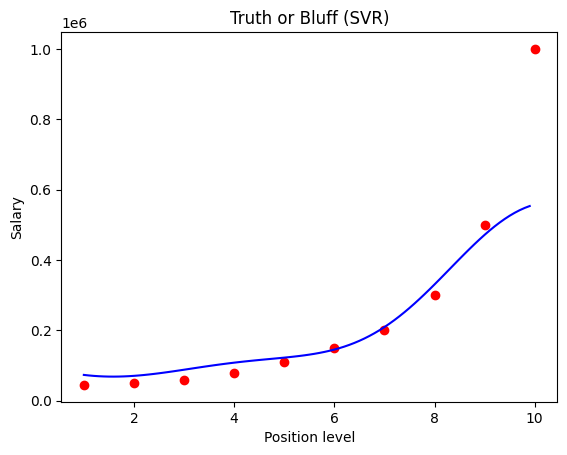

In [20]:
X_grid = np.arange(min(sc_inde.inverse_transform(X)), max(sc_inde.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_inde.inverse_transform(X), sc_depen.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_depen.inverse_transform((regressor.predict(sc_inde.transform(X_grid))).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()